In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import cufflinks as cf
import plotly.offline as plyo
import datetime as dt


%matplotlib inline
plyo.init_notebook_mode(connected = True)

plt.style.use('seaborn')

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

def create_plot(x, y, styles, labels, axlabels):
    plt.figure(figsize=(10, 6))
    for i in range(len(x)):
        plt.plot(x[i], y[i], styles[i], label=labels[i])
        plt.xlabel(axlabels[0])
        plt.ylabel(axlabels[1])
        plt.legend(loc=0)

# Need to incorporate a date2num here
def hash_func(x, m , b):
    return np.exp(m*x + b)

In [92]:
df_hash = pd.read_csv('hash-rate', index_col = 0, parse_dates = True)
df_price = pd.read_csv('market-price', index_col = 0, parse_dates = True)
#Nothing interesting really happens before 2016

df_hash = df_hash[df_hash.index > '2016-01-01']
df_hash['log'] = np.log(df_hash['hash-rate'])
df_price = df_price[df_price.index > '2014-01-01']

# Hash Rate

In [3]:
df_hash['num'] = mdates.date2num(df_hash.index)


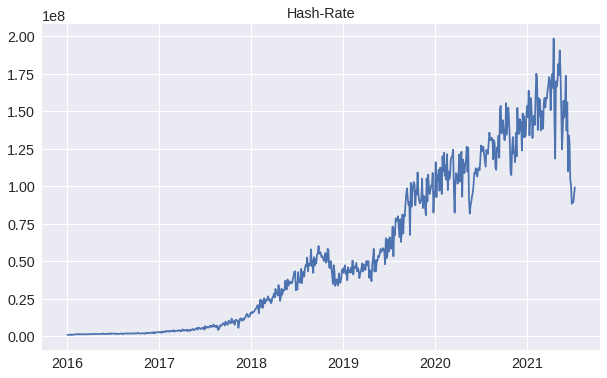

In [4]:
fig = plt.figure(figsize = (10,6))
plt.plot(df_hash['hash-rate']);
plt.title('Hash-Rate');
#plt.yscale('log')


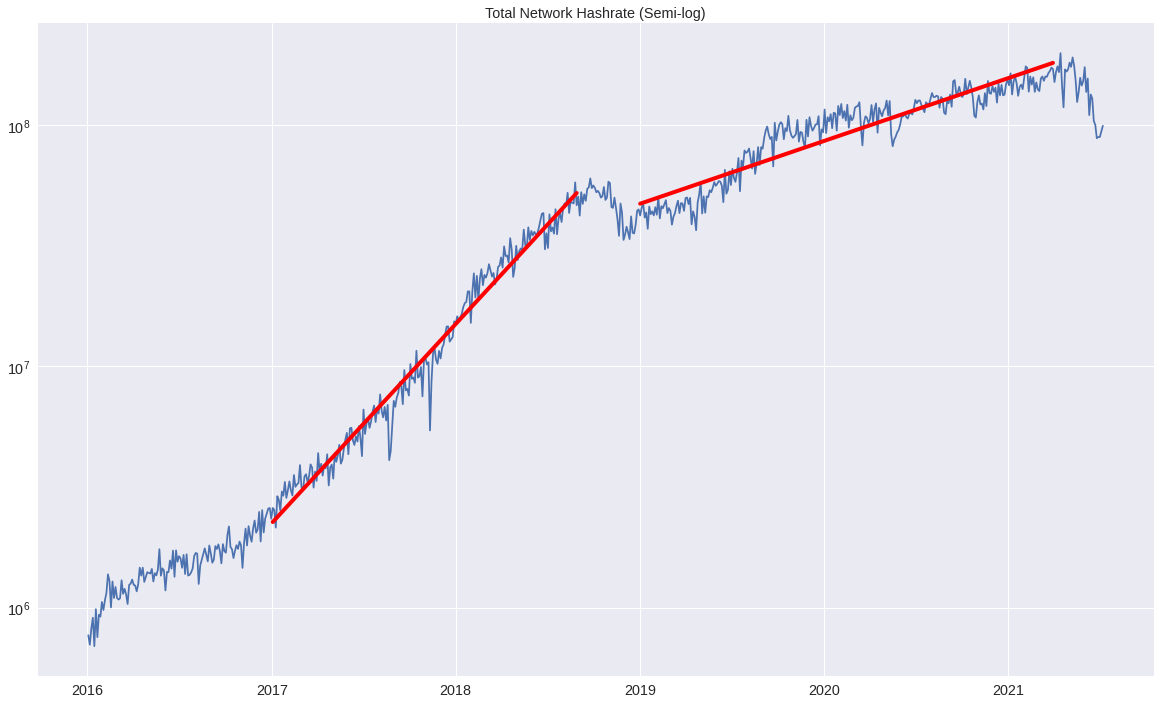

In [57]:


reg1 = np.polyfit(df_hash['num'][(df_hash.index > '2017') & (df_hash.index < '2018-9-1')], df_hash['log'][(df_hash.index > '2017')& (df_hash.index < '2018-9-1')], deg=1)
ry1 = np.polyval(reg1, df_hash['num'][(df_hash.index > '2017') & (df_hash.index < '2018-9-1')])

reg2 = np.polyfit(df_hash['num'][(df_hash.index > '2019') & (df_hash.index < '2021-4-1')], df_hash['log'][(df_hash.index > '2019')& (df_hash.index < '2021-4-1')], deg=1)
ry2 = np.polyval(reg2, df_hash['num'][(df_hash.index > '2019') & (df_hash.index < '2021-4-1')])

fig = plt.figure(figsize = (20,12))
plt.plot(df_hash.index, df_hash['hash-rate']);
plt.plot(df_hash.index[(df_hash.index > '2017') & (df_hash.index < '2018-9-1')], np.exp(ry1), color = 'r', linewidth = 4);
plt.plot(df_hash.index[(df_hash.index > '2019') & (df_hash.index < '2021-4-1')], np.exp(ry2), color = 'r', linewidth = 4);
plt.title('Total Network Hashrate (Semi-log)');
fig.savefig('networkhashrate.png')
plt.yscale('log')
#create_plot([df_hash.index, df_hash.index], [df_hash['log'], ry], ['b', 'r.'], ['f(x)', 'regression'], ['x', 'f(x)'])
#plt.yscale('log')

# Hashrate vs Price

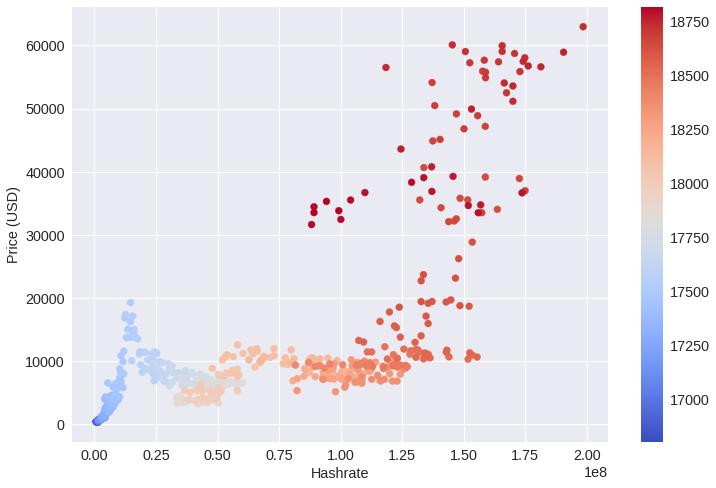

In [6]:
fig = plt.figure(figsize=(12,8))

c = np.linspace(0, df_hash.shape[0], num = df_hash.shape[0])
plt.scatter(df_hash['hash-rate'], df_price, c=df_hash['num'], cmap = 'coolwarm', marker = 'o');
plt.colorbar()
plt.xlabel('Hashrate');
plt.ylabel('Price (USD)');




In [55]:
df_hash.tail

<bound method NDFrame.tail of                         hash-rate        log           num
Timestamp                                                 
2016-01-02 23:00:00  7.694240e+05  13.553398  16802.958333
2016-01-05 23:00:00  7.022931e+05  13.462106  16805.958333
2016-01-08 23:00:00  8.210632e+05  13.618355  16808.958333
2016-01-11 23:00:00  9.088499e+05  13.719935  16811.958333
2016-01-14 23:00:00  6.930894e+05  13.448914  16814.958333
...                           ...        ...           ...
2021-06-26 00:00:00  8.818693e+07  18.294969  18804.000000
2021-06-29 00:00:00  8.917780e+07  18.306143  18807.000000
2021-07-02 00:00:00  8.917780e+07  18.306143  18810.000000
2021-07-05 00:00:00  9.424666e+07  18.361426  18813.000000
2021-07-08 00:00:00  9.924459e+07  18.413098  18816.000000

[672 rows x 3 columns]>

In [69]:
hash_func(525, reg[0], reg[1])

2.5030981295778753e-14

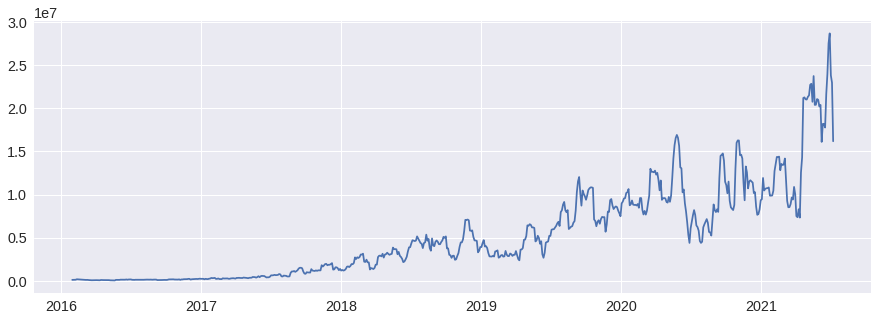

In [67]:
fig = plt.figure()
plt.plot(df_hash['hash-rate'].rolling(10).std())
fig.savefig('volatility.png')

In [82]:
df_hash.index[0]

Timestamp('2016-01-02 23:00:00')

# Market Price

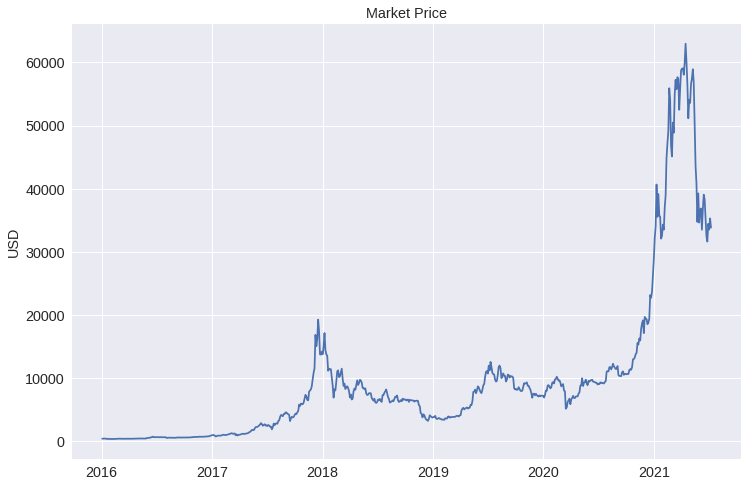

In [12]:
fig = plt.figure(figsize=(12,8))
plt.plot(df_price['market-price']);
plt.title('Market Price');
plt.ylabel('USD');



In [10]:
df_price.diff()


,market-price
Timestamp,
2016-01-02 23:00:00,NaN
2016-01-05 23:00:00,-0.33
2016-01-08 23:00:00,20.21
2016-01-11 23:00:00,-4.66
2016-01-14 23:00:00,-18.43
...,...
2021-06-26 00:00:00,-807.01
2021-06-29 00:00:00,2816.09
2021-07-02 00:00:00,-919.79


In [100]:
df_price.index.max() - df_price.index.min()

Timedelta('2742 days 01:00:00')

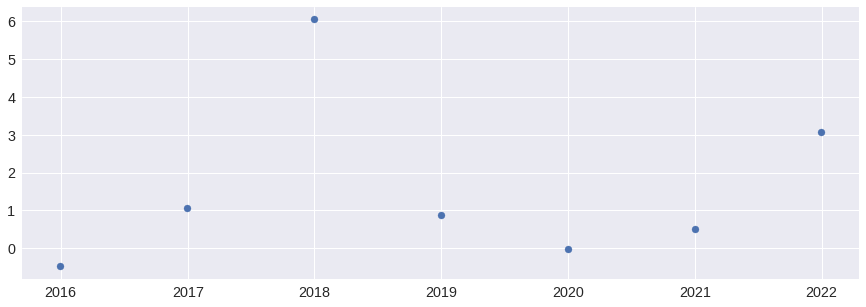

In [101]:
plt.scatter(df_price.resample('Y').mean().index, df_price.resample('Y').mean().pct_change());

In [104]:
df_price.resample('M').mean().pct_change().mean()

market-price    0.062792
dtype: float64

In [105]:
!pip install --upgrade jupyterlab jupyterlab-git

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 8.2 MB 522 kB/s eta 0:00:01
     |████████████████████████████████| 478 kB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 389 kB 2.2 MB/s eta 0:00:01
     |████████████████████████████████| 56 kB 3.3 MB/s  eta 0:00:01
     |████████████████████████████████| 75 kB 715 kB/s eta 0:00:01
     |████████████████████████████████| 68 kB 1.9 MB/s eta 0:00:01
     |████████████████████████████████| 5.1 MB 537 kB/s eta 0:00:01
     |████████████████████████████████| 170 kB 1.1 MB/s eta 0:00:01    |███▉                            | 20 kB 1.6 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 529 kB/s eta 0:00:01
     |████████████████████████████████| 63 kB 1.0 MB/s eta 0:00:01
  Attempting uninstall: anyio
    Found existing installation: anyio 2.0.2
    Uninstalling anyio-2.0.2:
      Successfully uninstalled anyio-2.0.2
  Attempting uninstall: jupyter-